<div style=text-align: center;>
    <H1> News Propagation analysis </H1>
</div>
Verneri Pudas

npudas18@student.oulu.fi

Y62762294

<H2> 1-3. Data collection </H2>

The data collection for this project was done with a custom datascraper. Data is from youtube, Facebook and X (formerly Twitter). The datascraper is built with Python and playwright library which provides a method for launching a browser. Using the playwright browser the scraper fetches raw html which is then later processed to get the wanted fields (likes, views, comments etc.) and saved as json files.

Running the datascraper is as simple as installing the required (requirements.txt) dependencies, setting the wanted links into the config.txt file and running the script.

The data in the included dataset was collected a bit over 3 days since the script crashed partway through the collection (a quite simple timeout error from that could have been averted with a simple try except clause when establishing connection) and restarted to get enough data. This explains the gap that appears in the dataset across all social medias and fields.

Another curious detail about the  data is that youtubes comments count field seems to have just disappeared during the collection (maybe comments were turned off for the video -will have to check). This can be seen in some of the graphs.


<H2> 4-5. Analysis </H2>

In [2]:
# Load data

import os
import json
import pandas as pd

data_root_folder = "..\\data_collection"
data_folders = {"\\data_collection_20250523_150956",
                "\\data_collection_20250525_213039",}

facebook_files = {}
youtube_files = {}
x_files = {}
directories = []

for folder in data_folders:
    directories.append((data_root_folder + folder))

for folder in directories:
    if not os.path.isdir(folder):
        print(f"Skipping {folder}, not a directory.")
        continue
    for file in os.listdir(folder):
        if file.startswith("facebook_") and file.endswith(".json"):
            full_path = os.path.join(folder, file)
            facebook_files[full_path] = []
        elif file.startswith("youtube_") and file.endswith(".json"):
            full_path = os.path.join(folder, file)
            youtube_files[full_path] = []
        elif file.startswith("x_") and file.endswith(".json"):
            full_path = os.path.join(folder, file)
            x_files[full_path] = []

print(f"Found {len(facebook_files)} Facebook files.")
print(f"Found {len(youtube_files)} YouTube files.")
print(f"Found {len(x_files)} X files.")

Found 69 Facebook files.
Found 69 YouTube files.
Found 70 X files.


<h3>Extract data into a pandas dataframes</h3>

X data

In [3]:
# Initialize an empty list to store the extracted data
x_data = []

# Iterate through each file in x_files
for file_path in x_files:
    with open(file_path, 'r') as f:
        # Extract timestamp from the filename and convert it to a datetime object
        basename = os.path.basename(file_path)
        splitname = basename.split('_')
        timestamp_str = splitname[2] + '_' + splitname[3].replace('.json', '')
        timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d_%H%M%S')

        # Load the JSON data
        json_data = json.load(f)

        # Extract the required fields
        x_data.append({
            "timestamp": timestamp,
            "favorite_count": json_data['data']['tweetResult']['result']['legacy']['favorite_count'],
            "quote_count": json_data['data']['tweetResult']['result']['legacy']['quote_count'],
            "reply_count": json_data['data']['tweetResult']['result']['legacy']['reply_count'],
            "retweet_count": json_data['data']['tweetResult']['result']['legacy']['retweet_count'],
        })

# Create a pandas DataFrame from the extracted data
x_df = pd.DataFrame(x_data)

Facebook Data

In [4]:
# Initialize an empty list to store the extracted data
facebook_data = []

# Iterate through each file in facebook_files
for file_path in facebook_files:
    with open(file_path, 'r') as f:
        # Load the JSON data
        json_data = json.load(f)

        # Extract the required fields
        facebook_data.append({
            "timestamp": pd.to_datetime(json_data['timestamp'], format='%Y%m%d_%H%M%S'),
            "comments": json_data['comments'],
            "shares": json_data['shares'],
            "reactions": json_data['reactions'],
        })

# Create a pandas DataFrame from the extracted data
facebook_df = pd.DataFrame(facebook_data)

Youtube data

In [5]:
# Initialize an empty list to store the extracted data
youtube_data = []

# Iterate through each file in youtube_data
for file_path in youtube_files:
    with open(file_path, 'r') as f:
        # Load the JSON data
        json_data = json.load(f)

        # Extract the required fields
        youtube_data.append({
            "timestamp": pd.to_datetime(json_data['timestamp'], format='%Y%m%d_%H%M%S'),
            "comments": json_data['comments'],
            "likes": json_data['likes'],
            "views": json_data['views'],
        })

# Create a pandas DataFrame from the extracted data
youtube_df = pd.DataFrame(youtube_data)
print(youtube_df)

             timestamp  comments  likes  views
0  2025-05-25 21:30:39       NaN    831  88991
1  2025-05-25 22:31:00       NaN    833  89366
2  2025-05-25 23:31:19       NaN    837  89688
3  2025-05-26 00:31:37       NaN    839  90003
4  2025-05-26 01:31:54       NaN    841  90260
..                 ...       ...    ...    ...
64 2025-05-24 07:14:57     970.0    673  62488
65 2025-05-24 08:15:17     972.0    683  63647
66 2025-05-24 09:15:33     980.0    695  64642
67 2025-05-24 10:15:47       NaN    705  65745
68 2025-05-24 11:16:05       NaN    716  67009

[69 rows x 4 columns]


Functions for plotting each element of data in a dataframe as a function of time

In [6]:
import matplotlib.pyplot as plt
def plot_youtube_data(youtube_df):
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Likes
    axs[0].plot(youtube_df['timestamp'], youtube_df['likes'], marker='o', color='blue')
    axs[0].set_ylabel('Likes')
    axs[0].set_title('YouTube Likes Over Time')
    axs[0].grid(True)

    # Comments
    axs[1].plot(youtube_df['timestamp'], youtube_df['comments'], marker='^', color='orange')
    axs[1].set_ylabel('Comments')
    axs[1].set_title('YouTube Comments Over Time')
    axs[1].grid(True)

    # Views
    axs[2].plot(youtube_df['timestamp'], youtube_df['views'], marker='s', color='red')
    axs[2].set_ylabel('Views')
    axs[2].set_title('YouTube Views Over Time')
    axs[2].set_xlabel('Timestamp')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

def plot_x_df(x_df):
    fig, axs = plt.subplots(4, 1, figsize=(10, 14), sharex=True)

    # Favorite count
    axs[0].plot(x_df['timestamp'], x_df['favorite_count'], marker='o', color='blue')
    axs[0].set_ylabel('Favorites')
    axs[0].set_title('X Favorites Over Time')
    axs[0].grid(True)

    # Quote count
    axs[1].plot(x_df['timestamp'], x_df['quote_count'], marker='^', color='orange')
    axs[1].set_ylabel('Quotes')
    axs[1].set_title('X Quotes Over Time')
    axs[1].grid(True)

    # Reply count
    axs[2].plot(x_df['timestamp'], x_df['reply_count'], marker='s', color='green')
    axs[2].set_ylabel('Replies')
    axs[2].set_title('X Replies Over Time')
    axs[2].grid(True)

    # Retweet count
    axs[3].plot(x_df['timestamp'], x_df['retweet_count'], marker='d', color='red')
    axs[3].set_ylabel('Retweets')
    axs[3].set_title('X Retweets Over Time')
    axs[3].set_xlabel('Timestamp')
    axs[3].grid(True)

    plt.tight_layout()
    plt.show()

def plot_facebook_df(facebook_df):
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Reactions
    axs[0].plot(facebook_df['timestamp'], facebook_df['reactions'], marker='o', color='blue')
    axs[0].set_ylabel('Reactions')
    axs[0].set_title('Facebook Reactions Over Time')
    axs[0].grid(True)

    # Comments
    axs[1].plot(facebook_df['timestamp'], facebook_df['comments'], marker='^', color='orange')
    axs[1].set_ylabel('Comments')
    axs[1].set_title('Facebook Comments Over Time')
    axs[1].grid(True)

    # Shares
    axs[2].plot(facebook_df['timestamp'], facebook_df['shares'], marker='s', color='red')
    axs[2].set_ylabel('Shares')
    axs[2].set_title('Facebook Shares Over Time')
    axs[2].set_xlabel('Timestamp')
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

Plot Graphs for evolution of the values across the data collection period

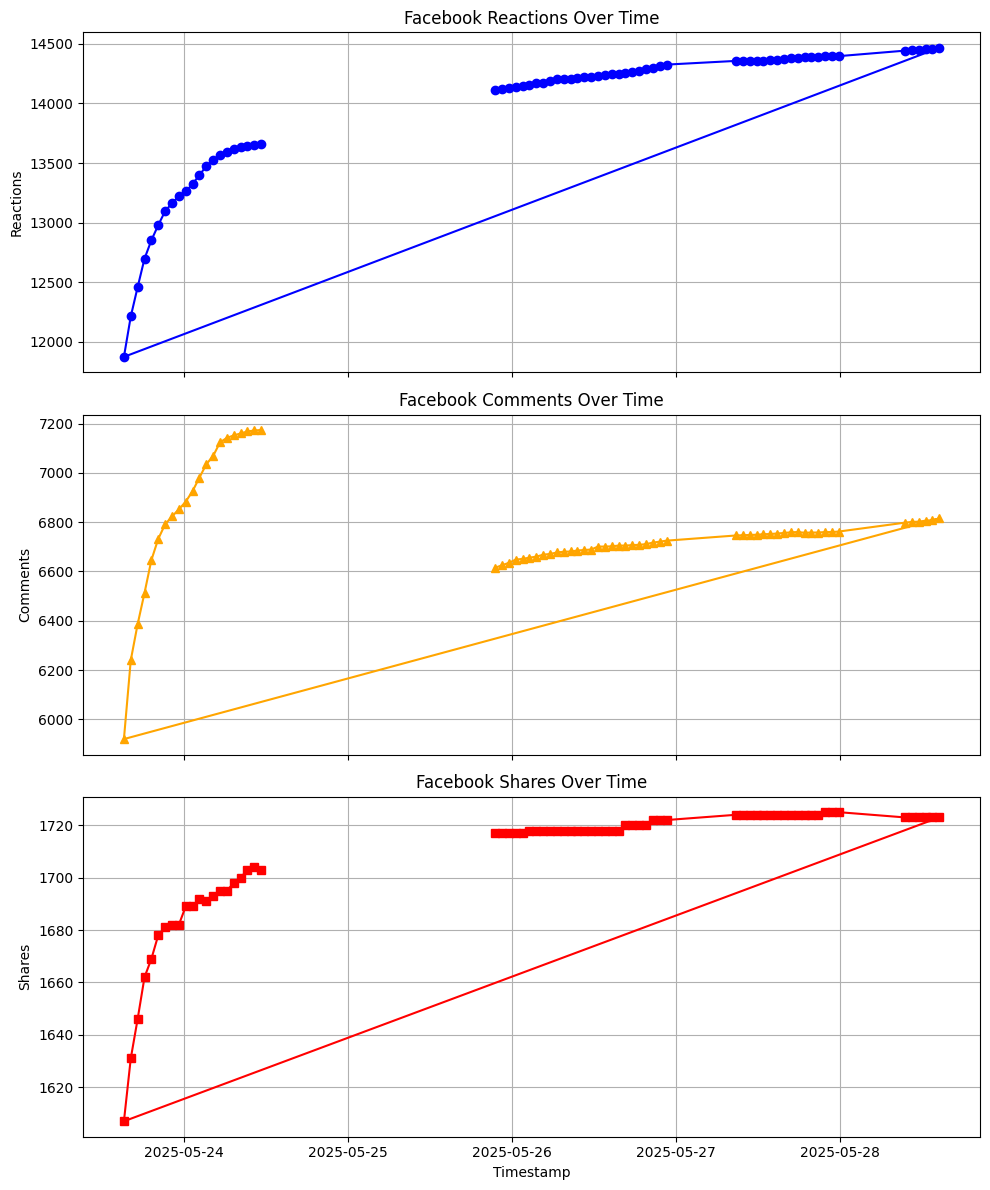

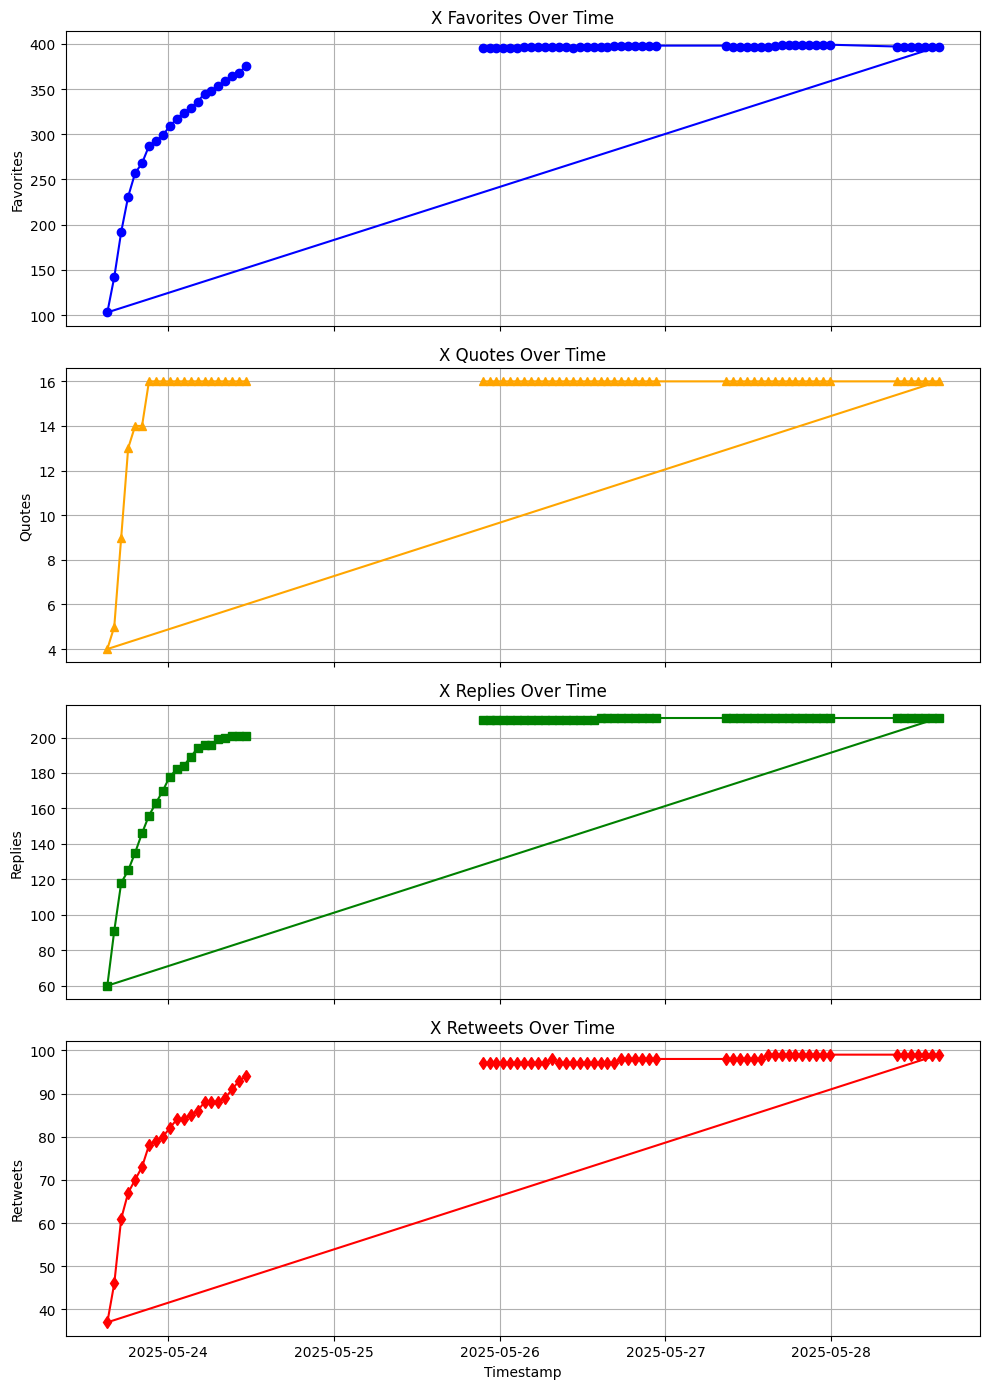

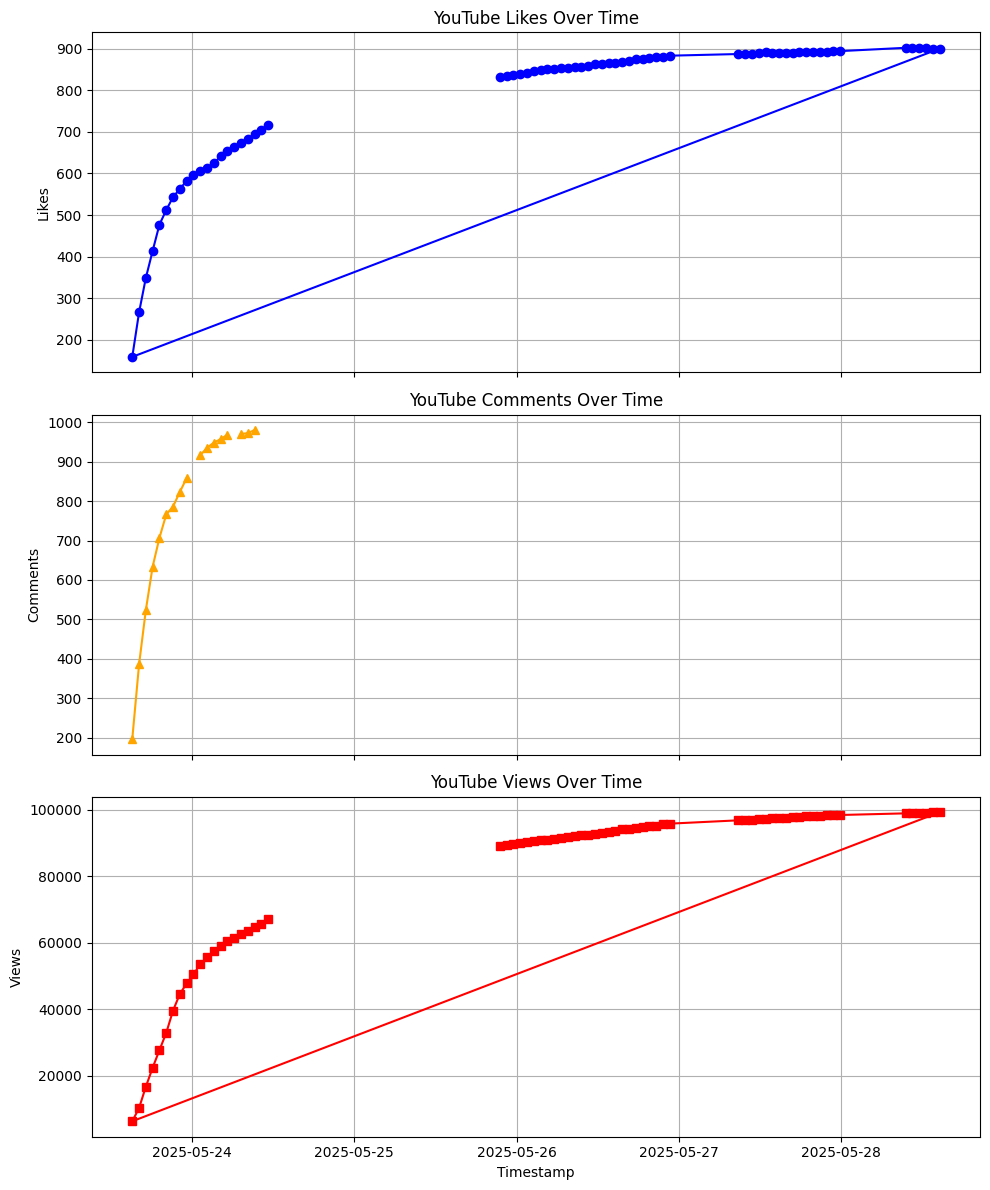

In [7]:
plot_facebook_df(facebook_df)
plot_x_df(x_df)
plot_youtube_data(youtube_df)

Fit polynomial curve and record goodness using r-squared measure

In [8]:
import numpy as np

def fit_and_plot_poly(df, x_col, y_col, degree=2, ax=None):
    # Convert timestamps to ordinal for fitting
    x = df[x_col].map(pd.Timestamp.toordinal).values
    y = df[y_col].values

    # Fit polynomial
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    y_fit = poly(x)

    # R-squared calculation
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot original data and fit
    if ax is not None:
        ax.plot(df[x_col], y, 'o', label=f'{y_col} data')
        ax.plot(df[x_col], y_fit, '-', label=f'{y_col} fit (R²={r_squared:.2f})')
        ax.legend()
        ax.set_title(f'{y_col} (R²={r_squared:.2f})')
    return coeffs, r_squared

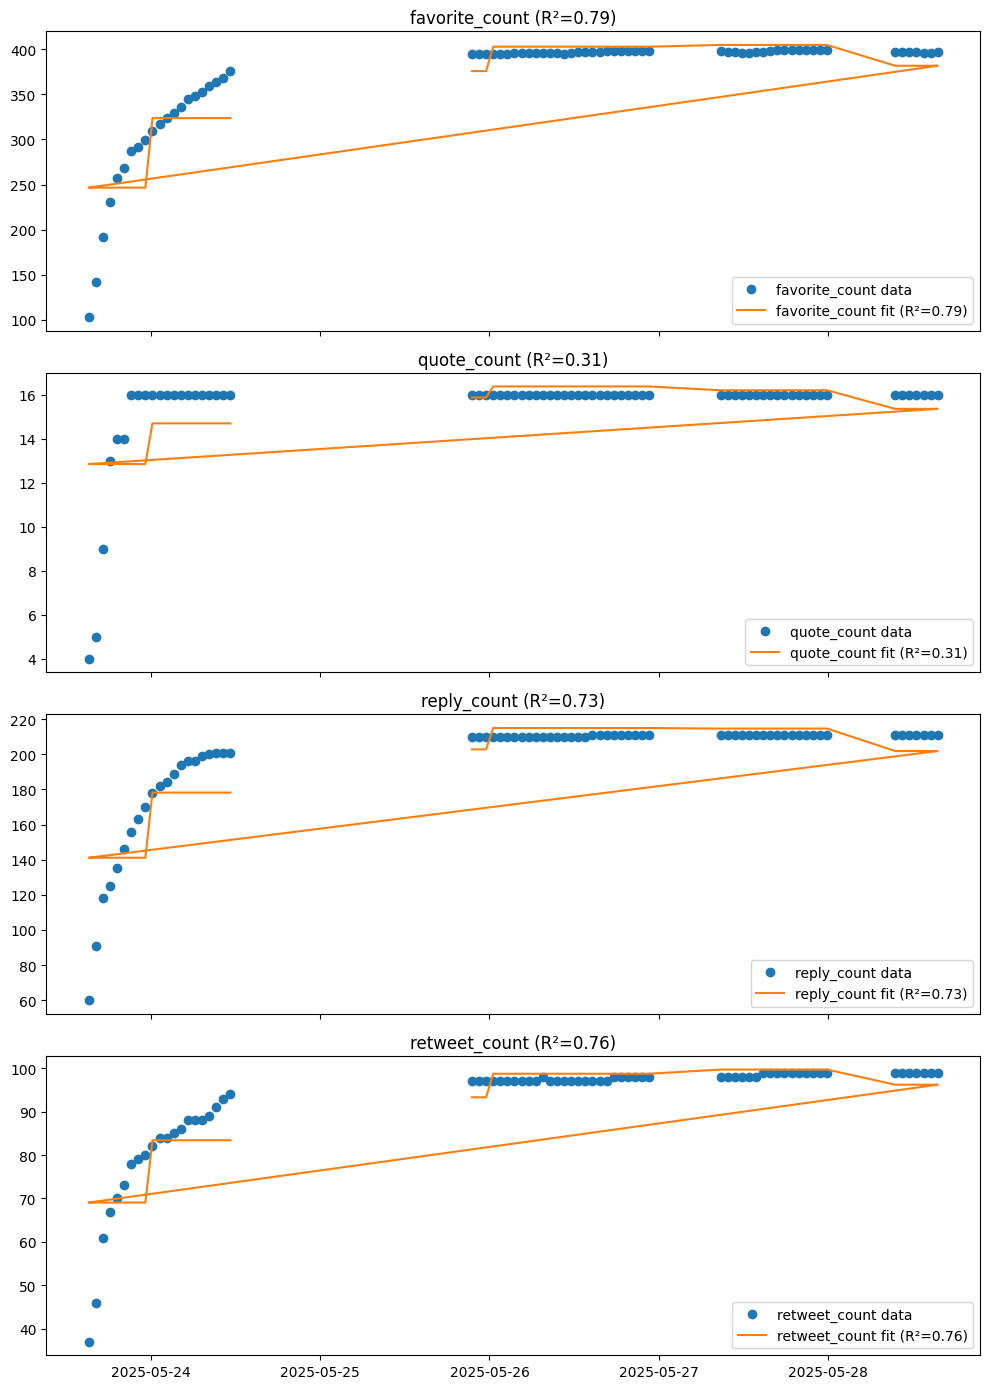

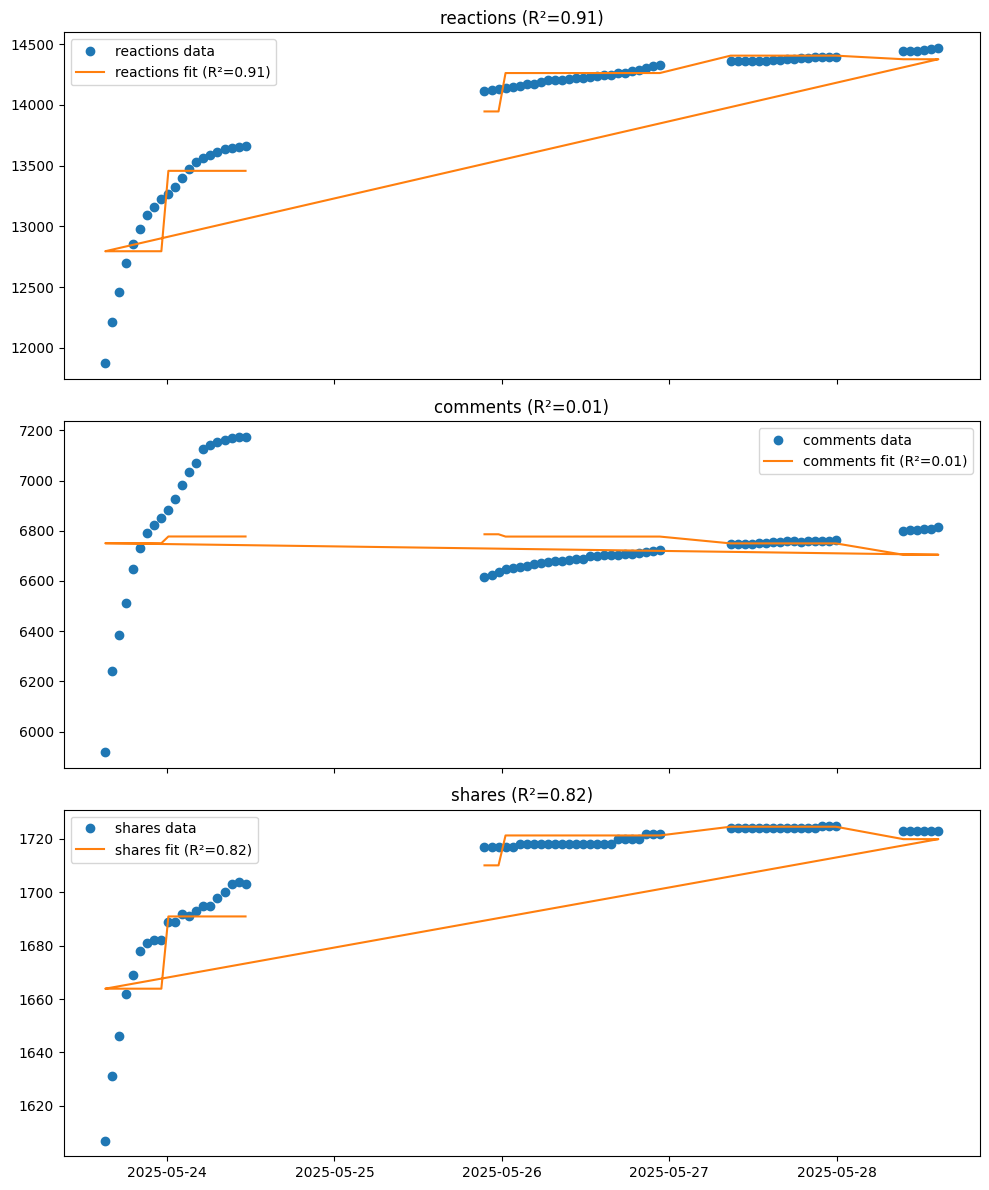

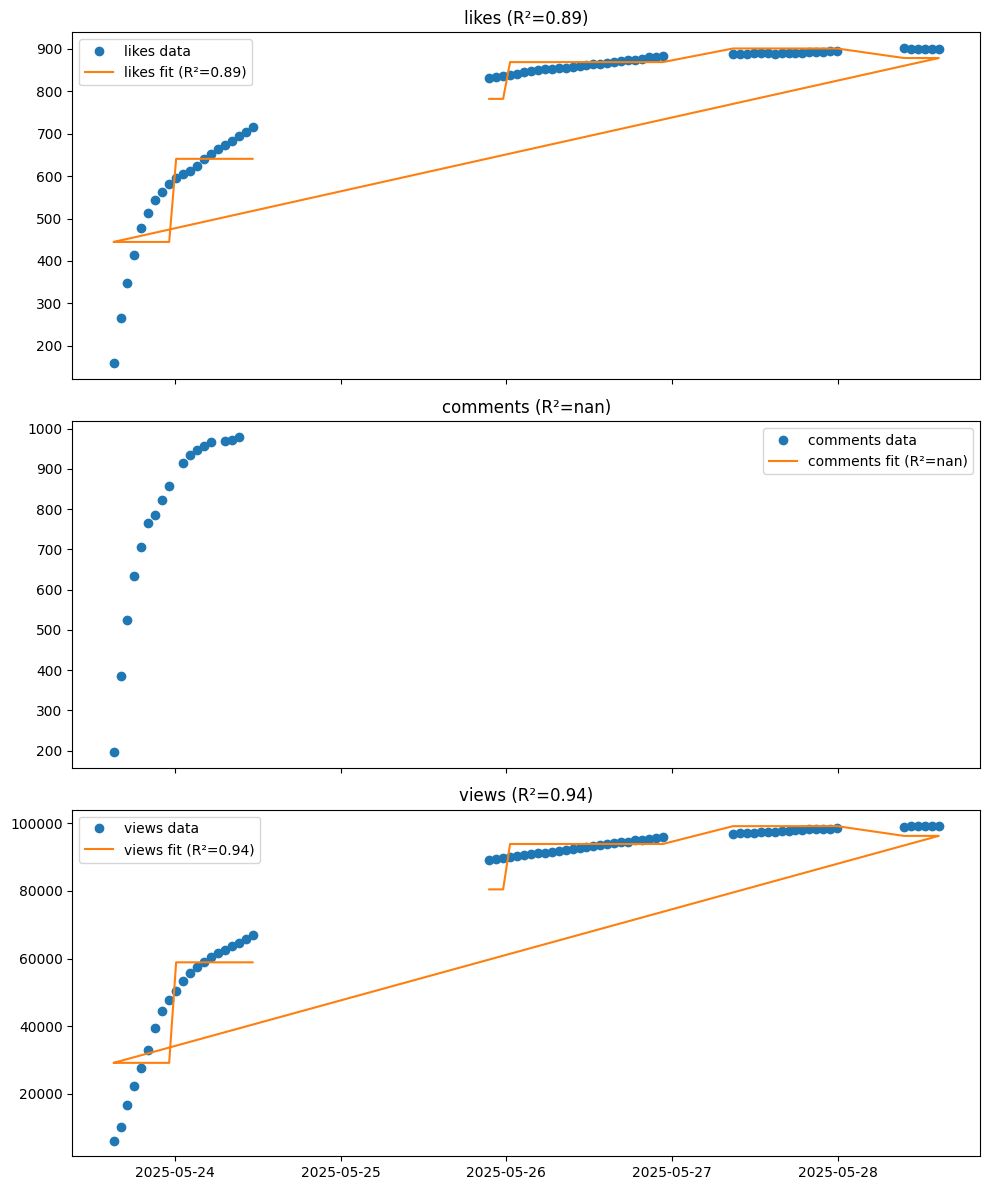

In [9]:
# Fit and plot polynomial for x_df
fig, axs = plt.subplots(4, 1, figsize=(10, 14), sharex=True)
fit_and_plot_poly(x_df, 'timestamp', 'favorite_count', ax=axs[0])
fit_and_plot_poly(x_df, 'timestamp', 'quote_count', ax=axs[1])
fit_and_plot_poly(x_df, 'timestamp', 'reply_count', ax=axs[2])
fit_and_plot_poly(x_df, 'timestamp', 'retweet_count', ax=axs[3])
plt.tight_layout()
plt.show()

# Fit and plot polynomial for facebook_df
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fit_and_plot_poly(facebook_df, 'timestamp', 'reactions', ax=axs[0])
fit_and_plot_poly(facebook_df, 'timestamp', 'comments', ax=axs[1])
fit_and_plot_poly(facebook_df, 'timestamp', 'shares', ax=axs[2])
plt.tight_layout()
plt.show()

# Fit and plot polynomial for youtube_df
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fit_and_plot_poly(youtube_df, 'timestamp', 'likes', ax=axs[0])
fit_and_plot_poly(youtube_df, 'timestamp', 'comments', ax=axs[1])
fit_and_plot_poly(youtube_df, 'timestamp', 'views', ax=axs[2])
plt.tight_layout()
plt.show()

Fit exponential curve and record goodness using r-squared measure

In [10]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

def fit_and_plot_exponential(df, x_col, y_col, ax=None):
    # Convert timestamps to ordinal and shift to start from zero
    x_raw = df[x_col].map(pd.Timestamp.toordinal).values
    x = x_raw - x_raw.min()
    y = df[y_col].values

    # Initial guess for parameters
    initial_guess = [1, 0.01, 1]

    # Fit exponential curve
    try:
        popt, _ = curve_fit(exponential_func, x, y, p0=initial_guess, maxfev=10000)
        y_fit = exponential_func(x, *popt)
        r_squared = r2_score(y, y_fit)
    except Exception as e:
        print(f"Exponential fit failed for {y_col}: {e}")
        popt = [np.nan, np.nan, np.nan]
        y_fit = np.full_like(y, np.nan)
        r_squared = np.nan

    # Plot original data and fit
    if ax is not None:
        ax.plot(df[x_col], y, 'o', label=f'{y_col} data')
        ax.plot(df[x_col], y_fit, '-', label=f'{y_col} exp fit (R²={r_squared:.2f})')
        ax.legend()
        ax.set_title(f'{y_col} (Exp R²={r_squared:.2f})')
    return popt, r_squared

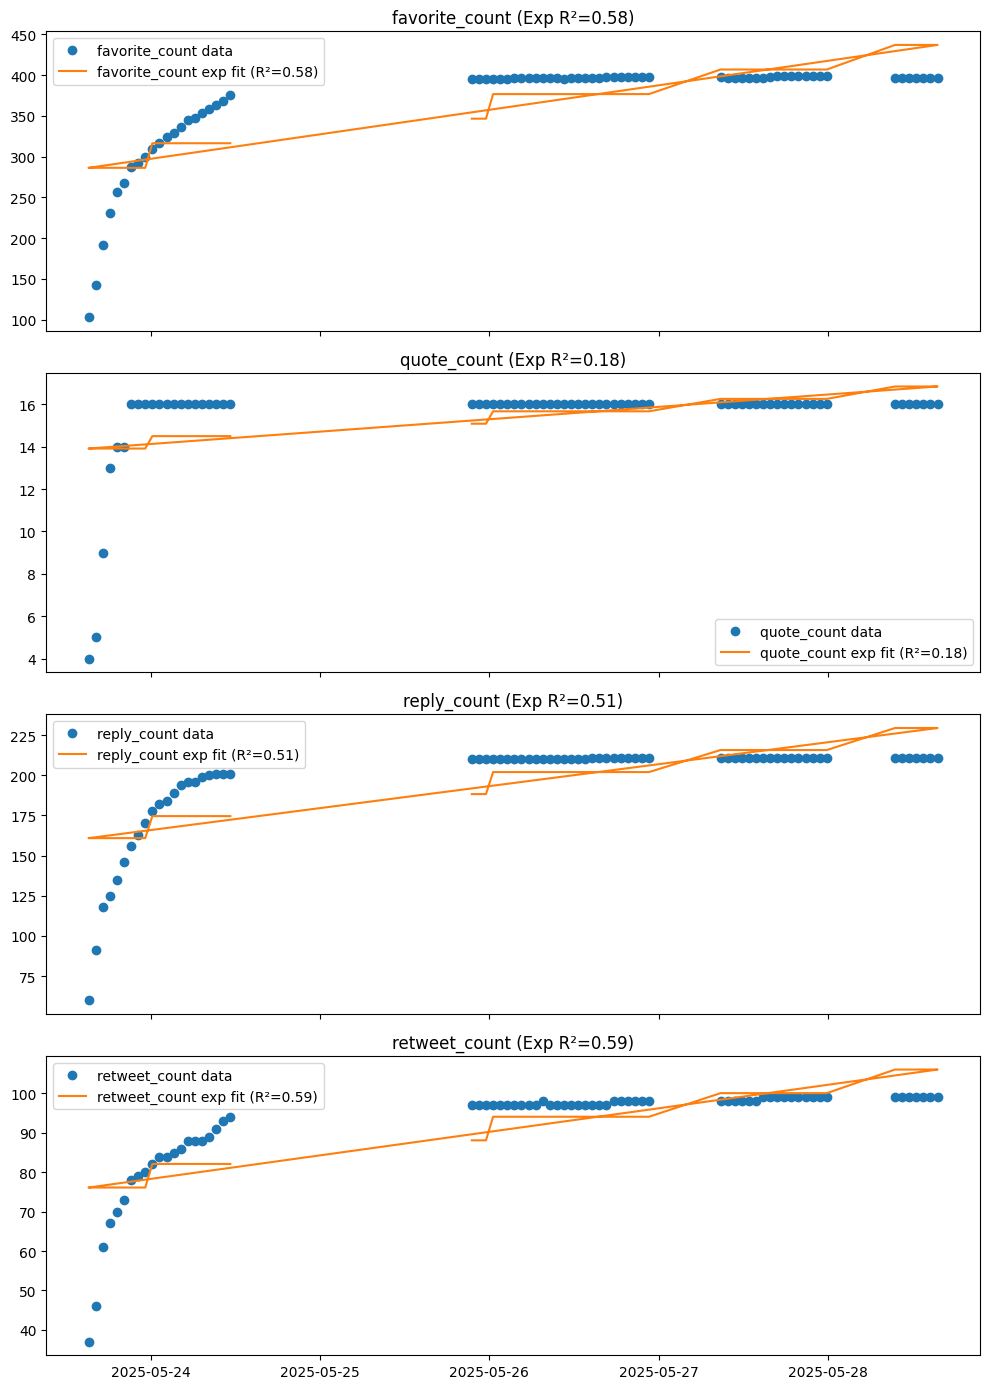

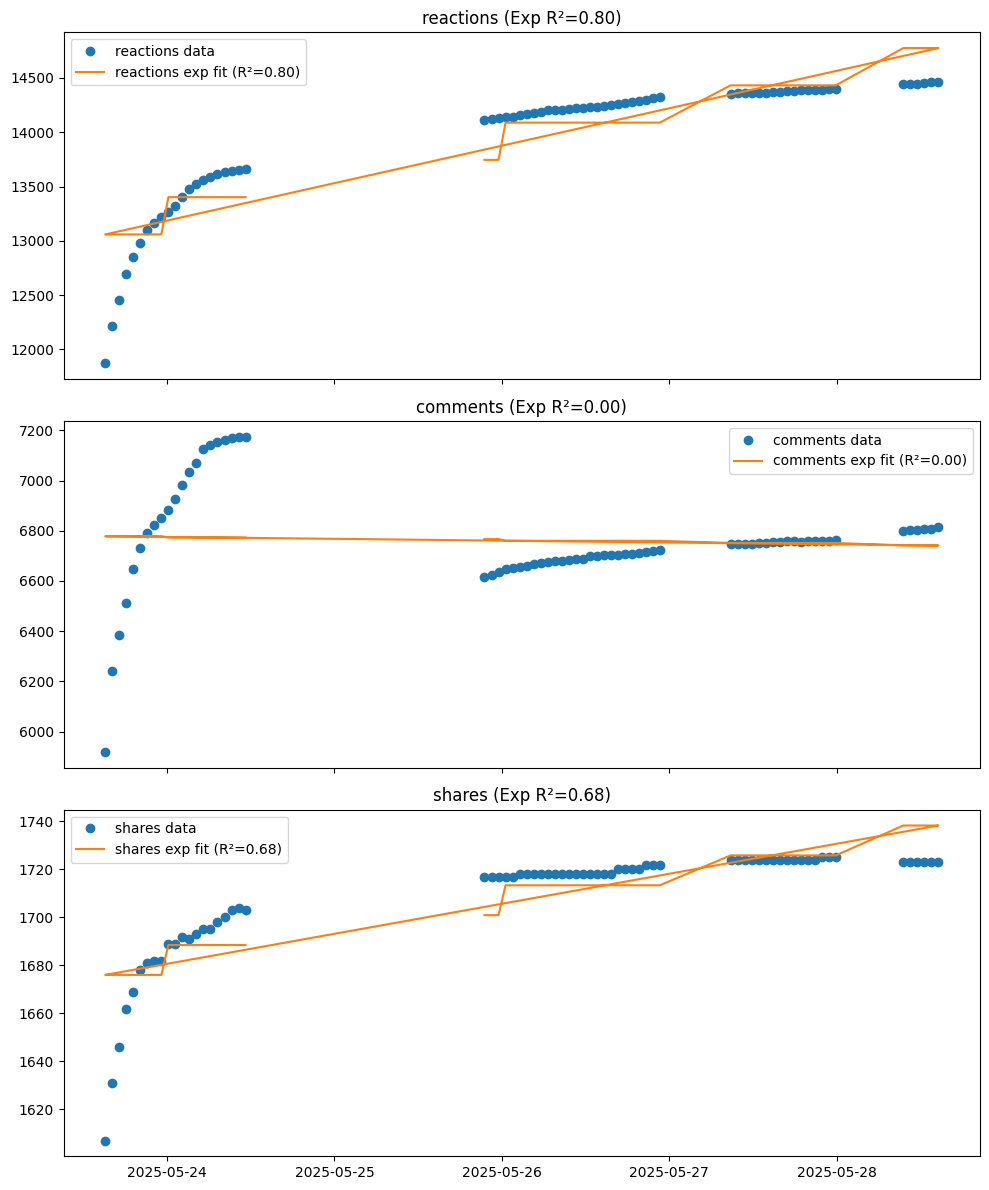

Exponential fit failed for comments: array must not contain infs or NaNs


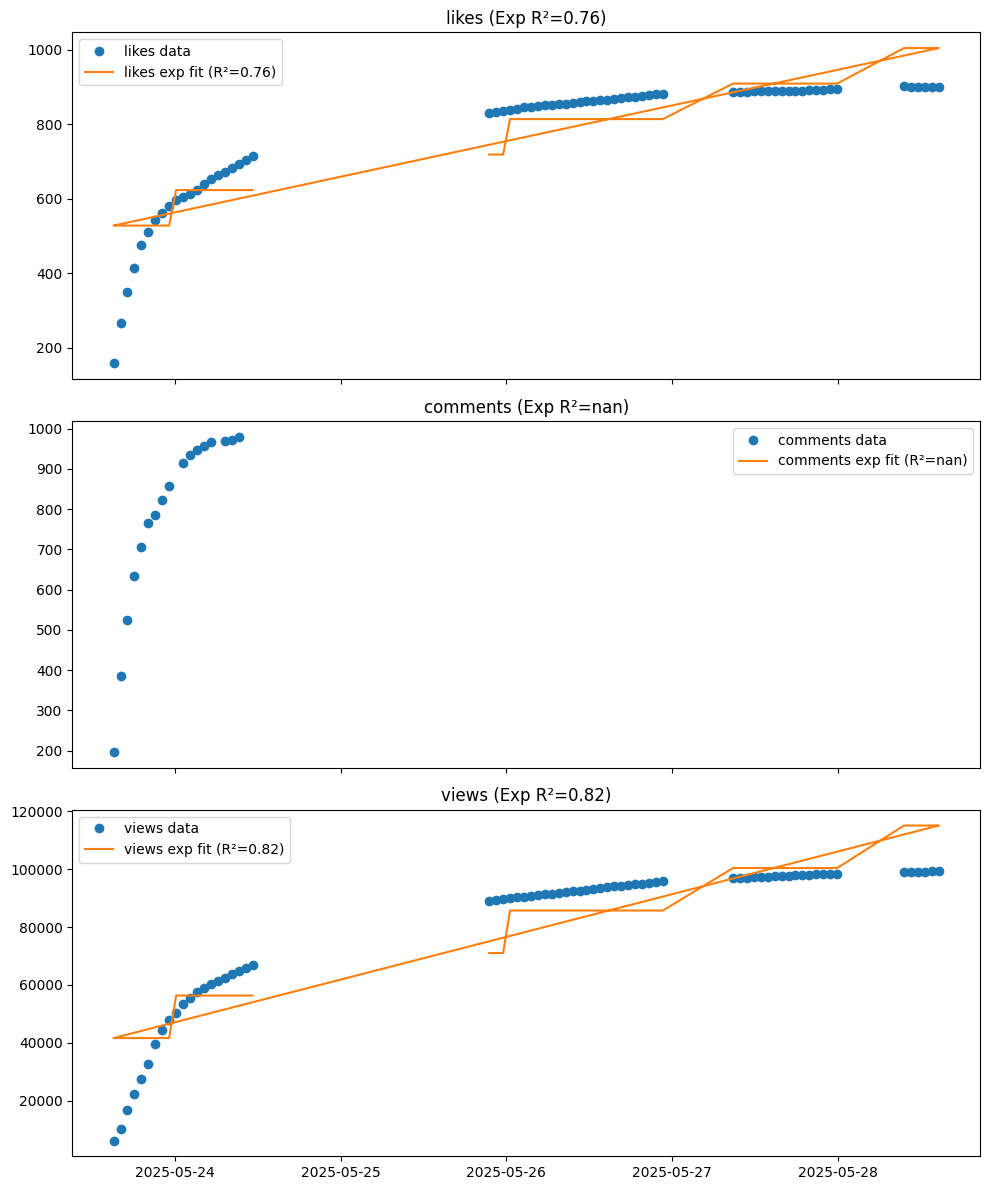

In [11]:
# Fit and plot polynomial for x_df
fig, axs = plt.subplots(4, 1, figsize=(10, 14), sharex=True)
fit_and_plot_exponential(x_df, 'timestamp', 'favorite_count', ax=axs[0])
fit_and_plot_exponential(x_df, 'timestamp', 'quote_count', ax=axs[1])
fit_and_plot_exponential(x_df, 'timestamp', 'reply_count', ax=axs[2])
fit_and_plot_exponential(x_df, 'timestamp', 'retweet_count', ax=axs[3])
plt.tight_layout()
plt.show()

# Fit and plot polynomial for facebook_df
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fit_and_plot_exponential(facebook_df, 'timestamp', 'reactions', ax=axs[0])
fit_and_plot_exponential(facebook_df, 'timestamp', 'comments', ax=axs[1])
fit_and_plot_exponential(facebook_df, 'timestamp', 'shares', ax=axs[2])
plt.tight_layout()
plt.show()

# Fit and plot polynomial for youtube_df
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
fit_and_plot_exponential(youtube_df, 'timestamp', 'likes', ax=axs[0])
fit_and_plot_exponential(youtube_df, 'timestamp', 'comments', ax=axs[1])
fit_and_plot_exponential(youtube_df, 'timestamp', 'views', ax=axs[2])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

def test_power_law(df, param, ax=None):
    # Remove NaN values
    values = df[param].dropna().values

    # Bin edges
    p_min, p_max = np.min(values), np.max(values)
    k = (p_max - p_min) / 10
    bins = np.linspace(p_min, p_max, 11)

    # Histogram (frequency count)
    counts, edges = np.histogram(values, bins=bins)
    bin_centers = (edges[:-1] + edges[1:]) / 2

    # Remove zero counts for log-log plot
    nonzero = counts > 0
    x = bin_centers[nonzero]
    y = counts[nonzero]

    # Log-log transform
    log_x = np.log10(x)
    log_y = np.log10(y)

    # Linear fit in log-log space
    model = LinearRegression()
    model.fit(log_x.reshape(-1, 1), log_y)
    log_y_pred = model.predict(log_x.reshape(-1, 1))
    r2 = r2_score(log_y, log_y_pred)

    # Plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(log_x, log_y, label='Data (log-log)')
    ax.plot(log_x, log_y_pred, color='red', label=f'Linear fit (R²={r2:.2f})')
    ax.set_xlabel(f'log10({param})')
    ax.set_ylabel('log10(Frequency)')
    ax.set_title(f'Power-law test for {param}')
    ax.legend()
    plt.show()

    return model.coef_[0], model.intercept_, r2

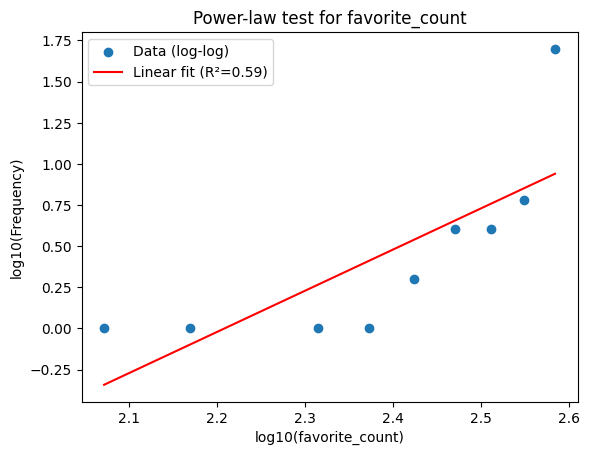

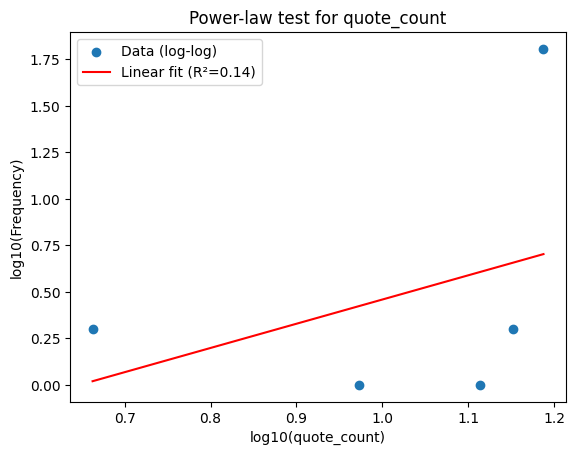

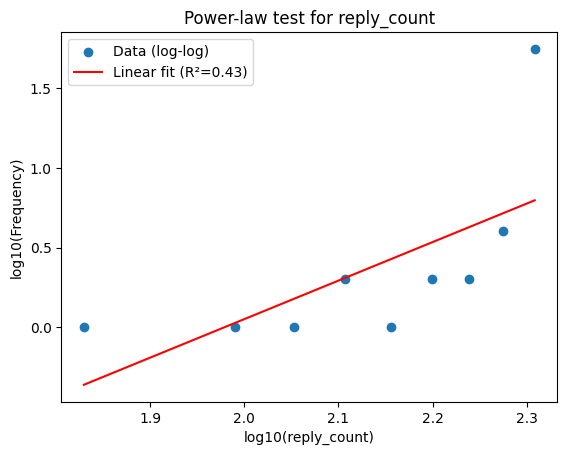

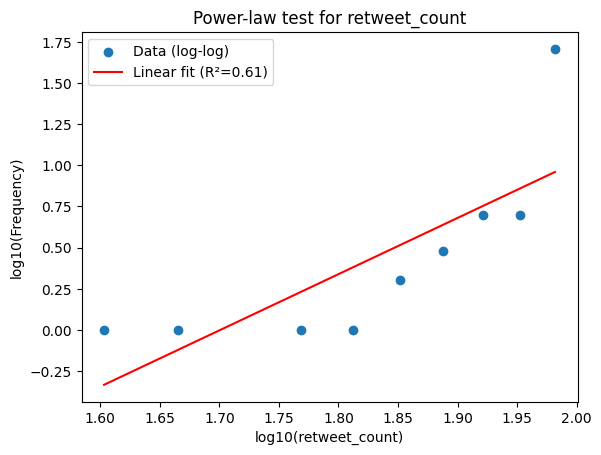

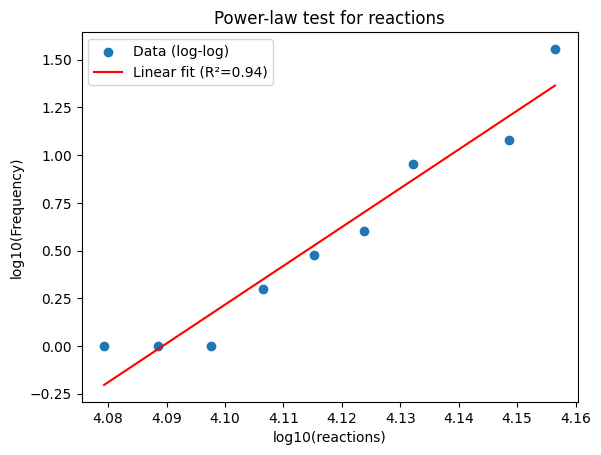

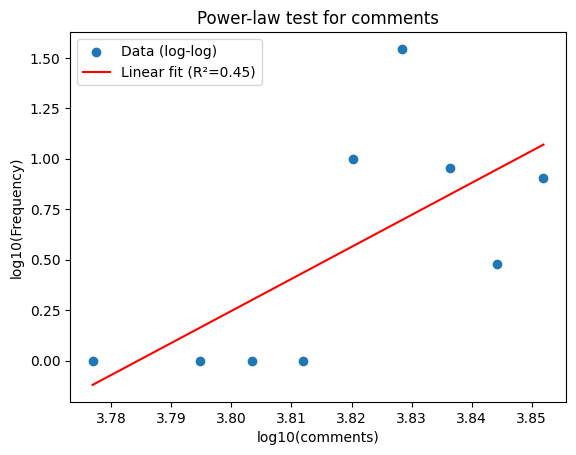

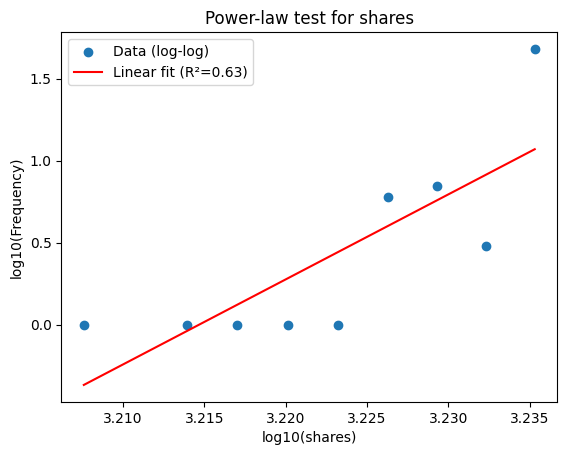

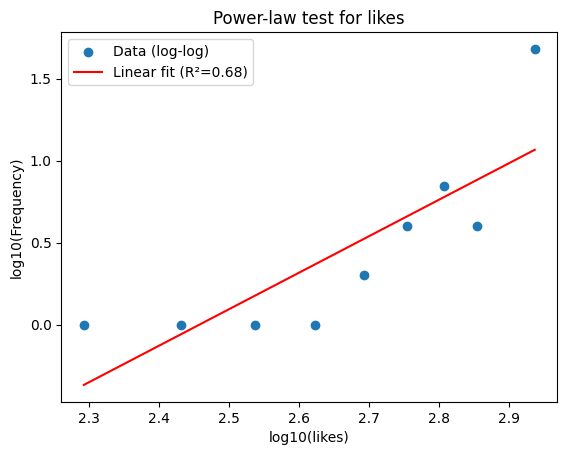

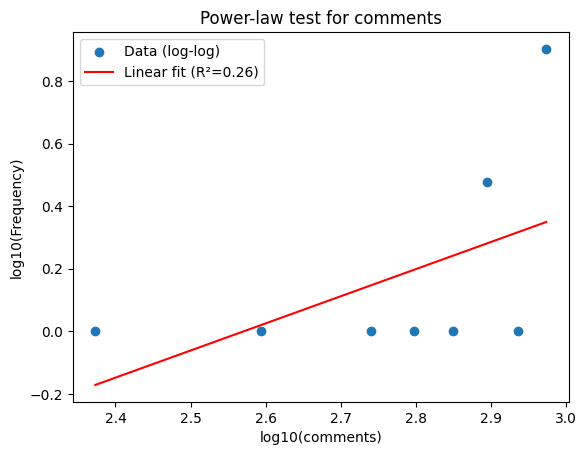

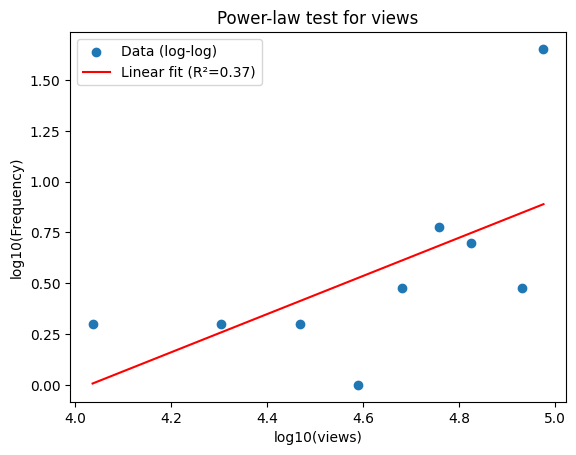

(np.float64(0.9388867211534208),
 np.float64(-3.7826850798746947),
 0.3703806960134798)

In [13]:
# Test power law for x_df
test_power_law(x_df, 'favorite_count')
test_power_law(x_df, 'quote_count')
test_power_law(x_df, 'reply_count')
test_power_law(x_df, 'retweet_count')

# Test power law for facebook_df
test_power_law(facebook_df, 'reactions')
test_power_law(facebook_df, 'comments')
test_power_law(facebook_df, 'shares')

# Test power law for youtube_df
test_power_law(youtube_df, 'likes')
test_power_law(youtube_df, 'comments')
test_power_law(youtube_df, 'views')

In [14]:
import networkx as nx
import ndlib.models.ModelConfig as mc
from ndlib.models.epidemics.SISModel import SISModel

def sis_simulation(data_points, population_size):
    # 1. Population size
    N = population_size
    observed = data_points.values

    # 2. Observed data
    observed = observed[::5] # downsample for memory efficiency

    # 3. Build network
    g = nx.erdos_renyi_graph(N, 0.01)

    # 4. Parameter grid
    betas = np.arange(0.05, 0.95, 0.05)
    gammas = np.arange(0.05, 0.95, 0.05)

    best_score = float('inf')
    best_params = None
    best_trend = None

    for beta in betas:
        for gamma in gammas:
            model = SISModel(g)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', beta)
            cfg.add_model_parameter('lambda', gamma)
            initial_infected = max(1, int(observed[0] * N / observed.max()))  # scale initial infected
            infected_nodes = np.random.choice(list(g.nodes()), initial_infected, replace=False)
            cfg.add_model_initial_configuration("Infected", infected_nodes)
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(len(observed))
            simulated = [it['node_count'][1] for it in iterations]  # 1 = Infected
            # Scale simulated to observed max for fair comparison
            simulated_scaled = np.array(simulated) * (observed.max() / N)
            mse = np.mean((simulated_scaled - observed) ** 2)
            if mse < best_score:
                best_score = mse
                best_params = (beta, gamma)
                best_trend = simulated_scaled

    print(f"Best SIS params for Facebook: beta={best_params[0]}, gamma={best_params[1]}, MSE={best_score}")
    import matplotlib.pyplot as plt
    plt.plot(observed, label='Observed')
    plt.plot(best_trend, label='SIS Simulated (scaled)')
    plt.legend()
    plt.title('SIS Model Fit - Facebook Shares')
    plt.show()
    return best_params, best_trend

In [15]:
from ndlib.models.epidemics.SIRModel import SIRModel

def sir_simulation(data_points, population_size):
    # 1. Population size
    N = population_size
    observed = data_points.values

    # 2. Downsample observed data for efficiency
    observed = observed[::5]

    # 3. Build network (sparse random graph)
    g = nx.erdos_renyi_graph(N, 0.01)

    # 4. Parameter grid
    betas = np.arange(0.05, 0.95, 0.05)
    gammas = np.arange(0.05, 0.95, 0.05)

    best_score = float('inf')
    best_params = None
    best_trend = None

    for beta in betas:
        for gamma in gammas:
            model = SIRModel(g)
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', beta)
            cfg.add_model_parameter('gamma', gamma)
            initial_infected = max(1, int(observed[0] * N / observed.max()))
            infected_nodes = np.random.choice(list(g.nodes()), initial_infected, replace=False)
            cfg.add_model_initial_configuration("Infected", infected_nodes)
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(len(observed))
            simulated = [it['node_count'][1] for it in iterations]  # 1 = Infected
            simulated_scaled = np.array(simulated) * (observed.max() / N)
            mse = np.mean((simulated_scaled - observed) ** 2)
            if mse < best_score:
                best_score = mse
                best_params = (beta, gamma)
                best_trend = simulated_scaled

    print(f"Best SIR params: beta={best_params[0]}, gamma={best_params[1]}, MSE={best_score}")
    plt.plot(observed, label='Observed')
    plt.plot(best_trend, label='SIR Simulated (scaled)')
    plt.legend()
    plt.title('SIR Model Fit')
    plt.show()
    return best_params, best_trend

Running SIS simulation with population size: 1000
Best SIS params for Facebook: beta=0.6500000000000001, gamma=0.05, MSE=4141.752857142847


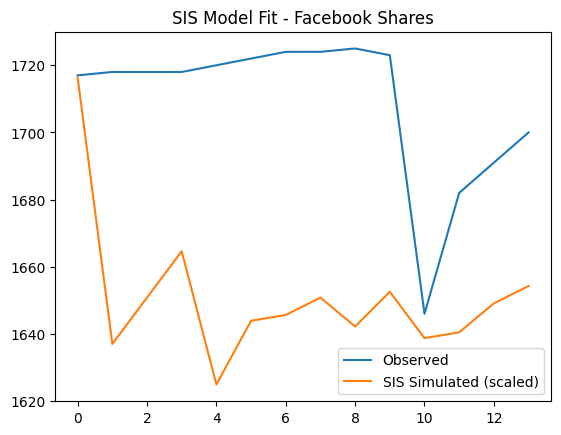

Elapsed time: 11.30 seconds
Running SIS simulation with population size: 2000
Best SIS params for Facebook: beta=0.8500000000000001, gamma=0.05, MSE=4129.683247767843


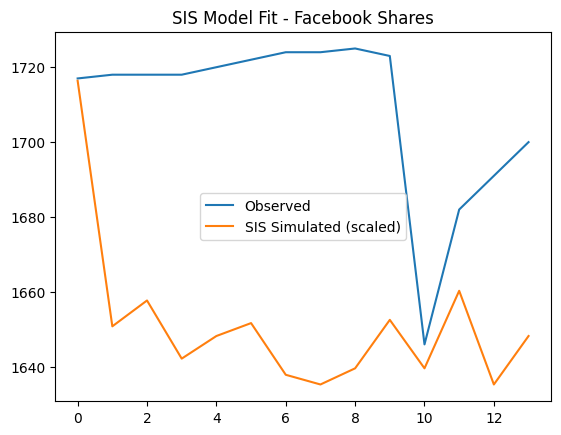

Elapsed time: 25.99 seconds
Running SIS simulation with population size: 3000
Best SIS params for Facebook: beta=0.6000000000000001, gamma=0.05, MSE=4186.074062500015


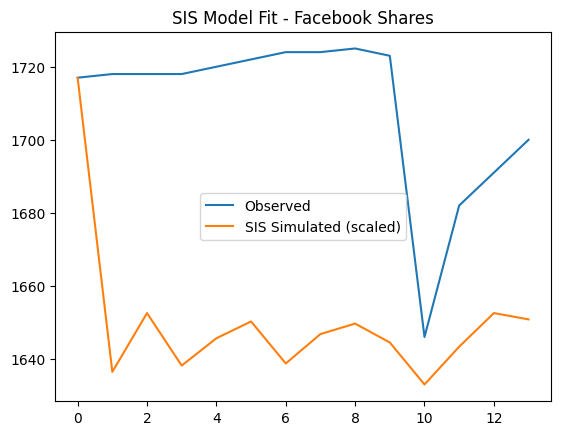

Elapsed time: 42.86 seconds
Running SIS simulation with population size: 4000
Best SIS params for Facebook: beta=0.45, gamma=0.05, MSE=4367.487589285698


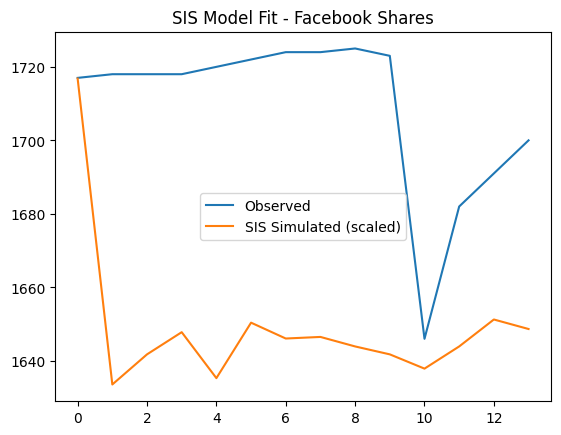

Elapsed time: 63.81 seconds
Stopping: iteration took more than 60 seconds.


In [16]:
import time

# DataFrame to store results
import pandas as pd
results = []

population_size = 1000
max_time = 60  # seconds

while True:
    print(f"Running SIS simulation with population size: {population_size}")
    start_time = time.time()
    best_params, best_trend = sis_simulation(facebook_df['shares'], population_size)
    elapsed = time.time() - start_time
    print(f"Elapsed time: {elapsed:.2f} seconds")
    # Log results
    results.append({
        "population_size": population_size,
        "beta": best_params[0],
        "gamma": best_params[1],
        "trend": best_trend,
        "elapsed_time": elapsed
    })
    if elapsed > max_time:
        print(f"Stopping: iteration took more than {max_time} seconds.")
        break
    population_size += 1000

# Convert results to DataFrame
sis_results_df = pd.DataFrame(results)

Running SIR simulation with population size: 1000
Best SIR params: beta=0.4, gamma=0.05, MSE=219601.910625


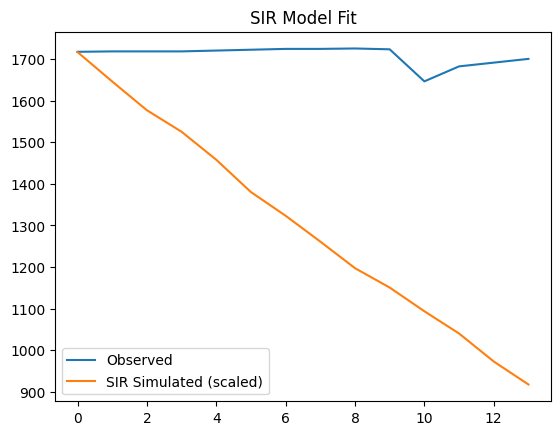

Elapsed time: 6.32 seconds
Running SIR simulation with population size: 2000
Best SIR params: beta=0.2, gamma=0.05, MSE=243926.73937499992


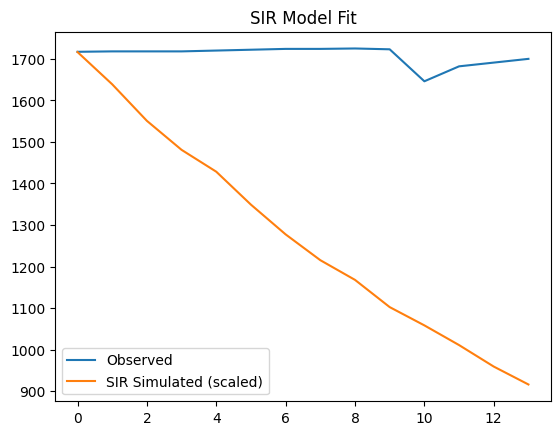

Elapsed time: 14.26 seconds
Running SIR simulation with population size: 3000
Best SIR params: beta=0.6500000000000001, gamma=0.05, MSE=238692.6950892858


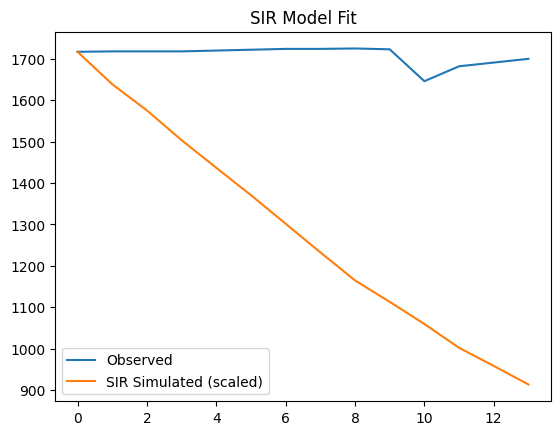

Elapsed time: 23.90 seconds
Running SIR simulation with population size: 4000
Best SIR params: beta=0.7000000000000001, gamma=0.05, MSE=243893.06760602677


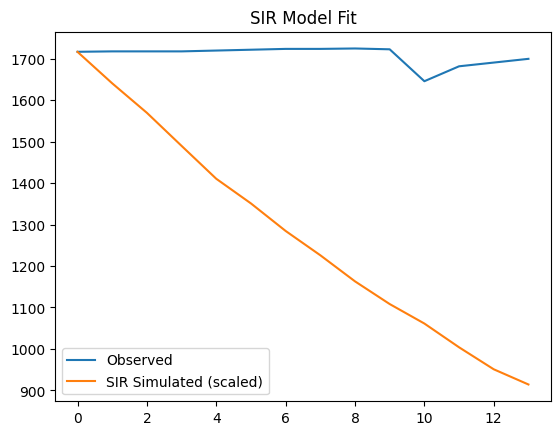

Elapsed time: 35.83 seconds
Running SIR simulation with population size: 5000
Best SIR params: beta=0.6500000000000001, gamma=0.05, MSE=246872.5638910715


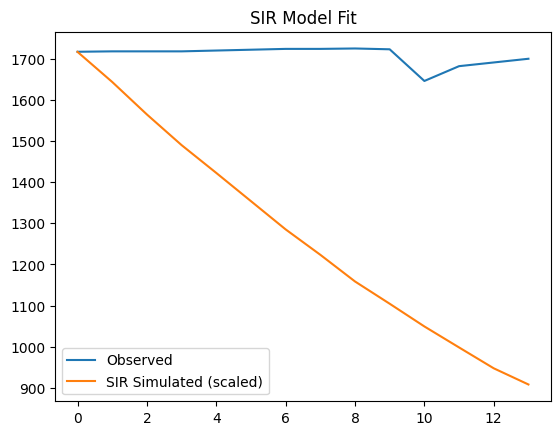

Elapsed time: 49.20 seconds
Running SIR simulation with population size: 6000
Best SIR params: beta=0.25, gamma=0.05, MSE=244300.60026785725


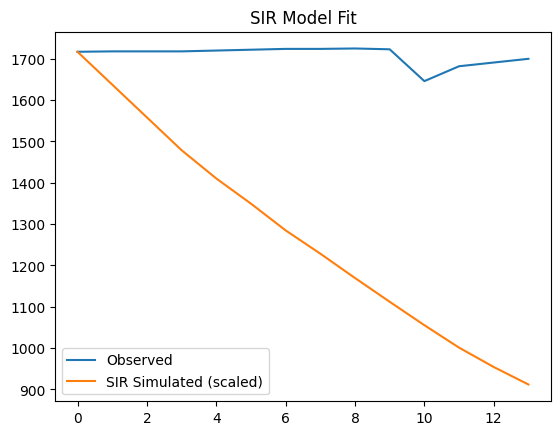

Elapsed time: 65.76 seconds
Stopping: iteration took more than 60 seconds.


In [17]:
import time

# DataFrame to store results
import pandas as pd
results = []

population_size = 1000
max_time = 60  # seconds

while True:
    print(f"Running SIR simulation with population size: {population_size}")
    start_time = time.time()
    best_params, best_trend = sir_simulation(facebook_df['shares'], population_size)
    elapsed = time.time() - start_time
    print(f"Elapsed time: {elapsed:.2f} seconds")
    # Log results
    results.append({
        "population_size": population_size,
        "beta": best_params[0],
        "gamma": best_params[1],
        "trend": best_trend,
        "elapsed_time": elapsed
    })
    if elapsed > max_time:
        print(f"Stopping: iteration took more than {max_time} seconds.")
        break
    population_size += 1000

# Convert results to DataFrame
sir_results_df = pd.DataFrame(results)

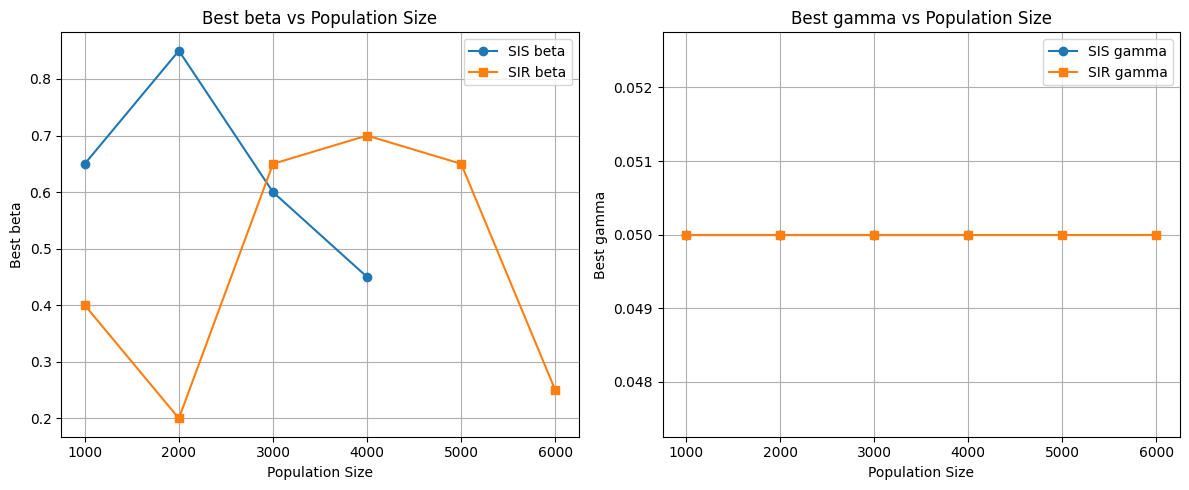

In [18]:
# Plot beta and gamma for SIS and SIR as a function of population size
plt.figure(figsize=(12, 5))

# Plot beta
plt.subplot(1, 2, 1)
plt.plot(sis_results_df['population_size'], sis_results_df['beta'], marker='o', label='SIS beta')
plt.plot(sir_results_df['population_size'], sir_results_df['beta'], marker='s', label='SIR beta')
plt.xlabel('Population Size')
plt.ylabel('Best beta')
plt.title('Best beta vs Population Size')
plt.legend()
plt.grid(True)

# Plot gamma
plt.subplot(1, 2, 2)
plt.plot(sis_results_df['population_size'], sis_results_df['gamma'], marker='o', label='SIS gamma')
plt.plot(sir_results_df['population_size'], sir_results_df['gamma'], marker='s', label='SIR gamma')
plt.xlabel('Population Size')
plt.ylabel('Best gamma')
plt.title('Best gamma vs Population Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Just for fun I've plotted the elapsed time as function of population size for both models

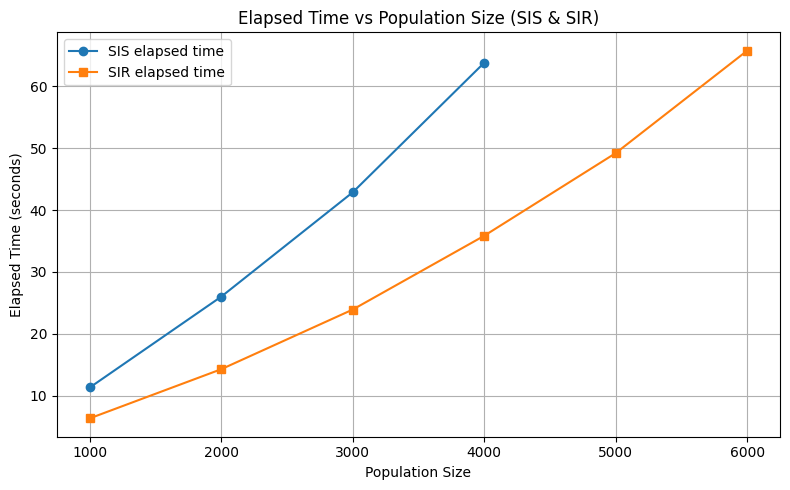

In [19]:
# Plot elapsed time as a function of population size for SIS and SIR models
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(sis_results_df['population_size'], sis_results_df['elapsed_time'], marker='o', label='SIS elapsed time')
plt.plot(sir_results_df['population_size'], sir_results_df['elapsed_time'], marker='s', label='SIR elapsed time')
plt.xlabel('Population Size')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Elapsed Time vs Population Size (SIS & SIR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h2>6. Relevant literature and discussion</h2>
</div>
<div style="text-align": left;>
    Some links to go through

    https://www.sciencedirect.com/science/article/abs/pii/S1877750315000824

    https://link.springer.com/content/pdf/10.1007/s00500-020-04915-7.pdf

    https://arxiv.org/pdf/1401.4208

    https://www.researchgate.net/profile/Hiroshi-Motoda/publication/
    220812435_Efficient_Estimation_of_Influence_Functions_for_SIS_Model_on_Social_Networks/links/0deec524cd28a7ffa1000000/Efficient-Estimation-of-Influence-Functions-for-SIS-Model-on-Social-Networks.pdf

    https://link.springer.com/content/pdf/10.1007/s10115-011-0396-2.pdf

    https://arxiv.org/pdf/1401.4208
    
    Although not directly related to this topic, still interesting and relevant to the discussion:
    
    https://academiccommons.columbia.edu/doi/10.7916/khdk-m460

</div>

- Compartmental epidemiological models SIS and SIR can be used to explain the initial spreading of the news post and the subsequent lessening of interaction with the post as the susceptible, infectious and recovered states of the models.
- SIS model implies that the infection provides no immunity for resistance to it which isn't an intuitive way of looking at interacting with social media posts. (!!!This needs backing up with a source!!!) Interactions with news posts on social media tend to be one and done deal (!!!get a better way of explainging this!!!) 
- Both SIS and SIR are computationally quite expensive when dealing with large sets of data as is often the case with social networks. In my case in order to keep the processing time manageable I was forced to use a subset of the data and instead of complete graphs I used Erdős–Rényi graphs.
    - In this case using complete graphs proved very memory intensive. I was able to completely fill up my 32GB of memory using complete graphs and full dataset with no end in sight to the processing :)
    - While Erdo Erdős–Rényi and complete graphs aren't strictly comparable it is a good approximation of how a social network might work realistically.
- These models don't take into account the social media platforms algorithms that largely dictate which content users are exposed to. Models that assume 'clinical' conditions where any user-user or user-post interactions are equally likely could be considered lacking and even misleading. This is why any analysis carried out purely by utilizing mathematical models such as SIR and SIS should be considered in the context of the specific social media platform.
    - In this case we can look at the distribution of interactions with a post during the observation period and extrapolate on how the algorithm exposes users to the post.